In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt

In [3]:
df =pd.read_csv("C:\\Users\\20109\\Downloads\\TexasTurbine.csv")
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [4]:
# looking the shape DataSet
df.shape

(8760, 6)

In [5]:
df.info()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time stamp                     8760 non-null   object 
 1   System power generated | (kW)  8760 non-null   float64
 2   Wind speed | (m/s)             8760 non-null   float64
 3   Wind direction | (deg)         8760 non-null   int64  
 4   Pressure | (atm)               8760 non-null   float64
 5   Air temperature | ('C)         8760 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [37]:
df.describe()

,Air temperature | ('C),Month,Wind speed | (m/s),Wind direction | (deg),Pressure | (atm)
count,1.0,1.0,1.000000,1.000000,1.000000
mean,21.0,1.0,19.359095,345.719186,919.313176
std,NaN,NaN,NaN,NaN,NaN
min,21.0,1.0,19.359095,345.719186,919.313176
25%,21.0,1.0,19.359095,345.719186,919.313176
50%,21.0,1.0,19.359095,345.719186,919.313176
75%,21.0,1.0,19.359095,345.719186,919.313176
max,21.0,1.0,19.359095,345.719186,919.313176


In [6]:
# convert data type column Timestamp from object to datetime
df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%b %d %H:%M:%S.%f')
# then use a lambda function to convert to datetime if it is a string else make is Not a Time
df['Time stamp'] = df['Time stamp'].apply(lambda x: dt.datetime.strptime(x,'%b %d %H:%M:%S.%f') if type(x)==str else pd.NaT)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Time stamp                     8760 non-null   datetime64[ns]
 1   System power generated | (kW)  8760 non-null   float64       
 2   Wind speed | (m/s)             8760 non-null   float64       
 3   Wind direction | (deg)         8760 non-null   int64         
 4   Pressure | (atm)               8760 non-null   float64       
 5   Air temperature | ('C)         8760 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB


In [8]:
# missing value
df.isnull().sum()

Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64

In [9]:
# check if any duplicate value
df.duplicated().sum()

0

In [10]:
# look  describe data set
df.describe().round(2)

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
count,8760.00,8760.00,8760.00,8760.00,8760.00
mean,964.47,7.38,146.62,0.99,22.15
std,878.56,3.14,84.68,0.01,4.86
min,0.00,0.12,0.00,0.97,3.26
25%,215.95,5.12,99.00,0.99,19.46
50%,693.97,7.34,135.00,0.99,22.76
75%,1562.29,9.60,169.00,1.00,26.06
max,3004.01,19.74,360.00,1.01,32.96


In [11]:
# add column Month 
df["Month"]=df["Time stamp"].dt.month

In [14]:
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month
0,1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1
1,1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1
2,1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1
3,1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1
4,1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1


# visualizations

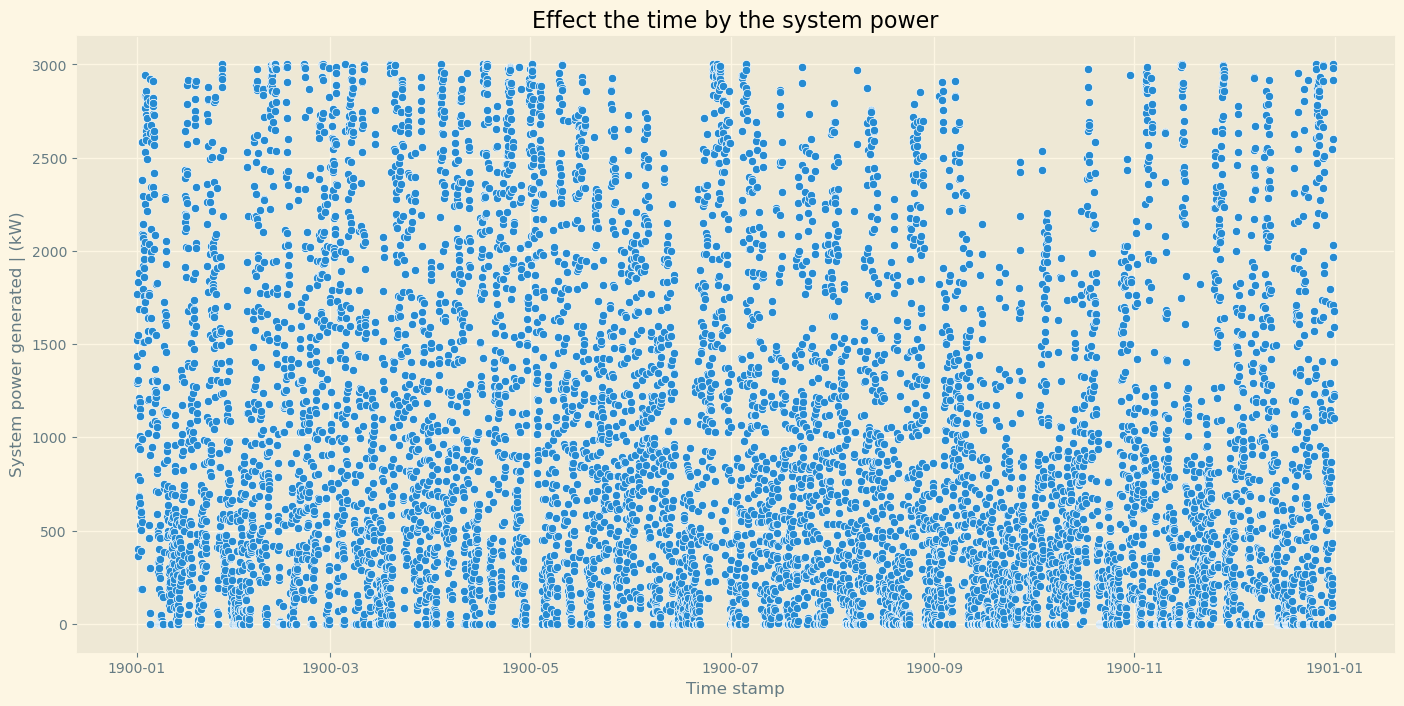

In [15]:
# the graph show effect the time by the system power

plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="System power generated | (kW)",)
plt.title("Effect the time by the system power")
plt.show()

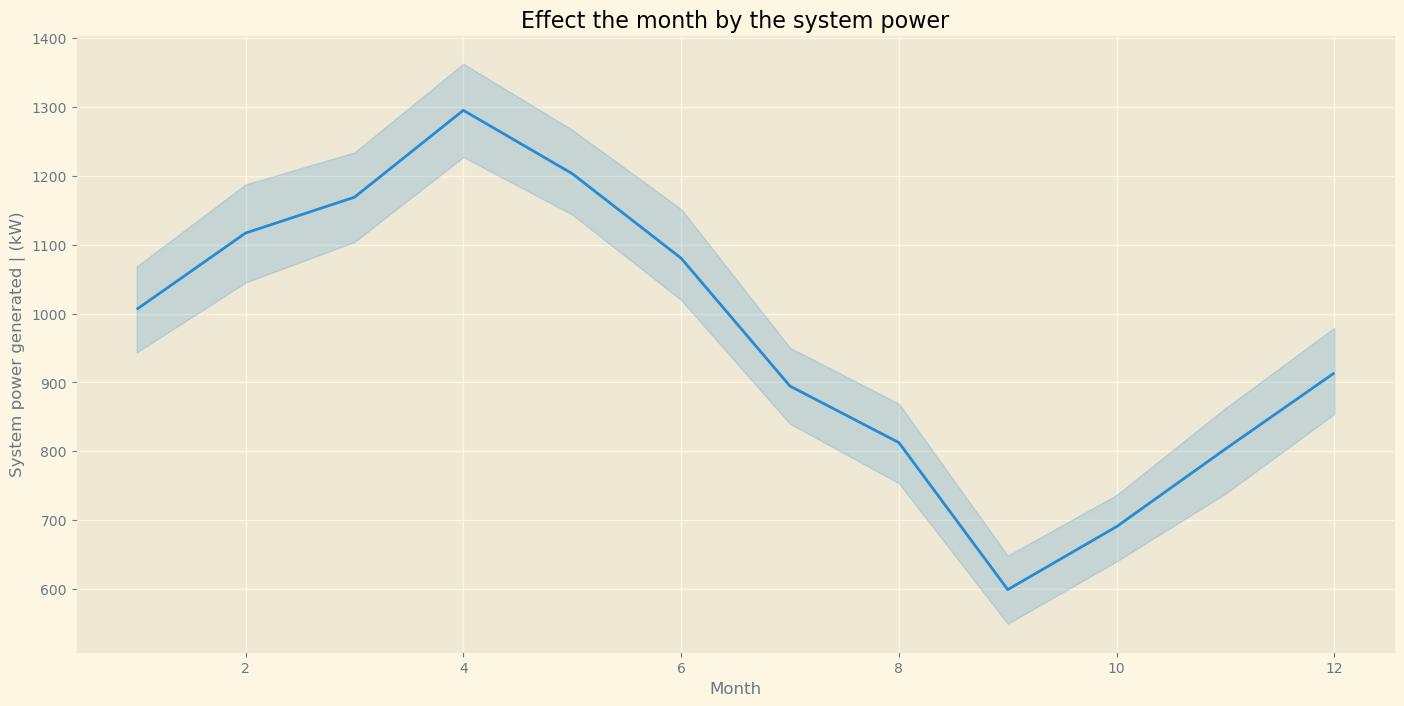

In [16]:
# the graph show effect the month by the system power
plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="System power generated | (kW)",)
plt.title("Effect the month by the system power")
plt.show()

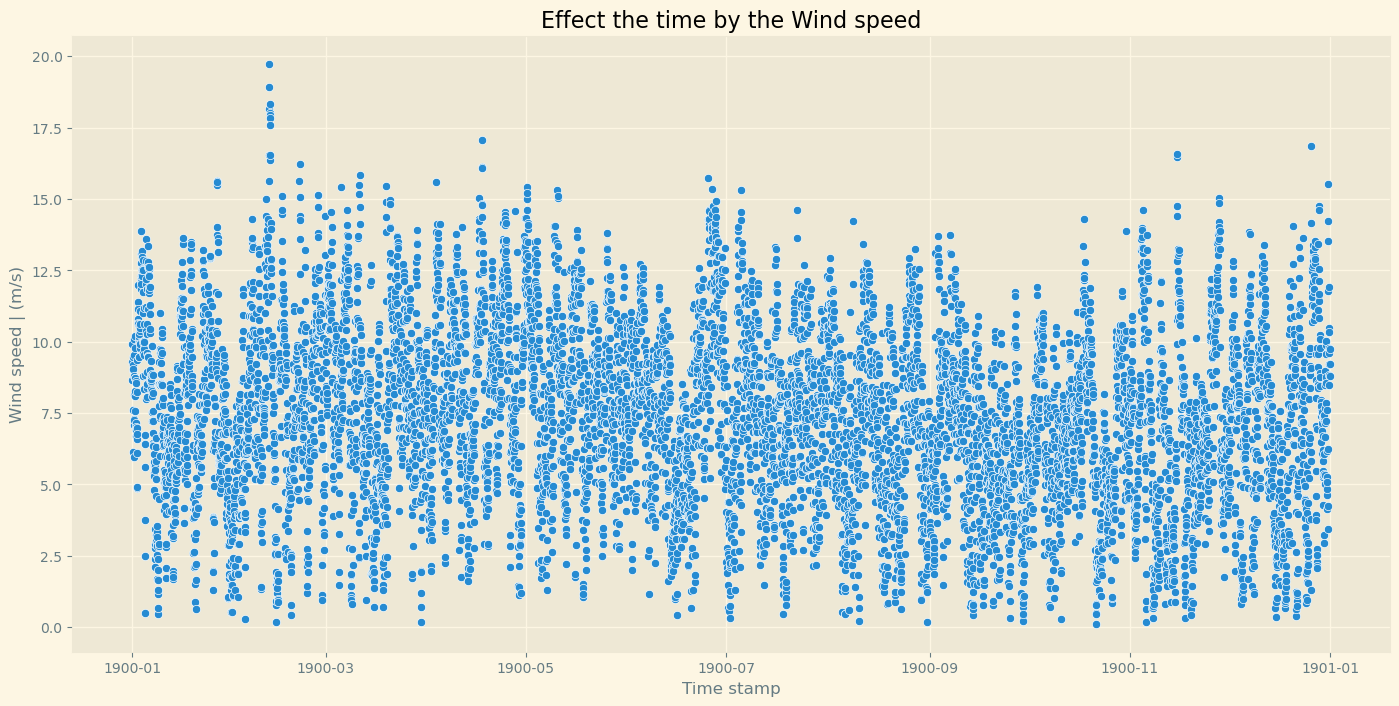

In [17]:
# the graph show effect the time by the Wind speed
plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="Wind speed | (m/s)",)
plt.title("Effect the time by the Wind speed")
plt.show()

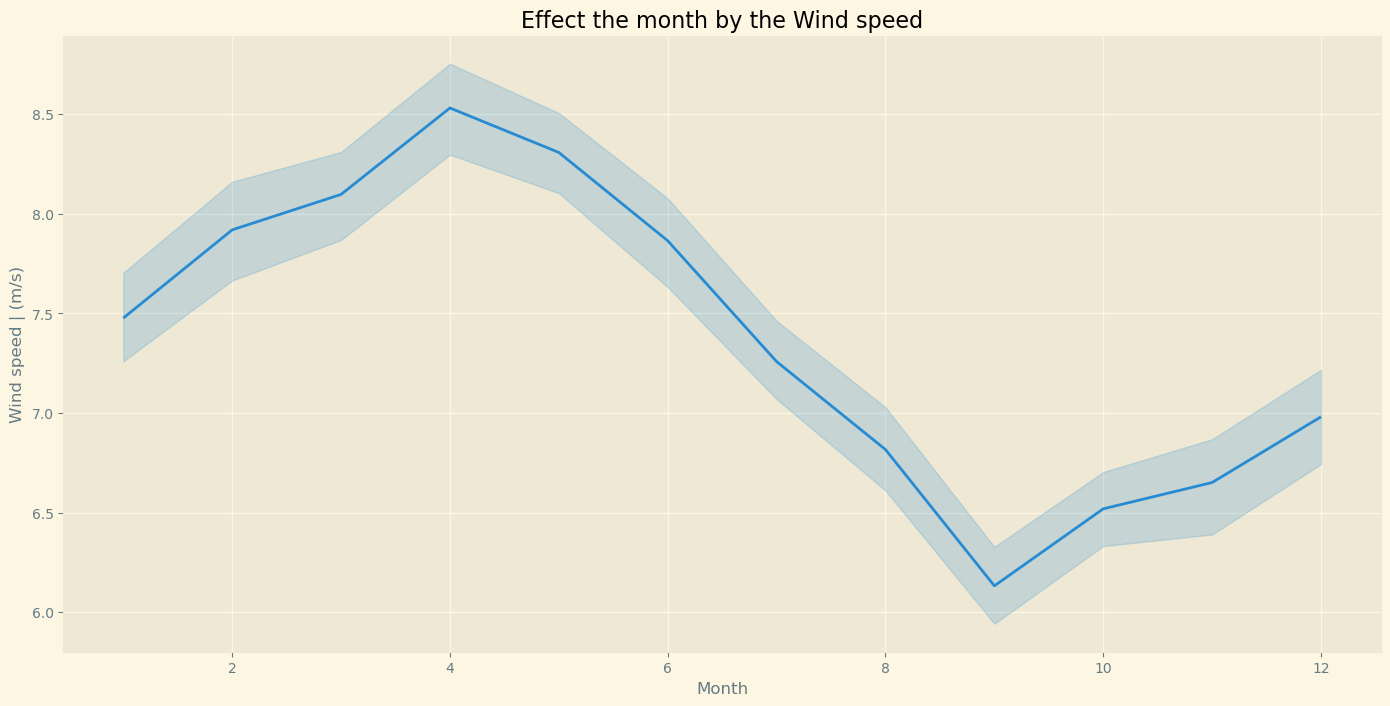

In [18]:
# the graph show effect the month by the Wind speed
plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Wind speed | (m/s)")
plt.title("Effect the month by the Wind speed")
plt.show()

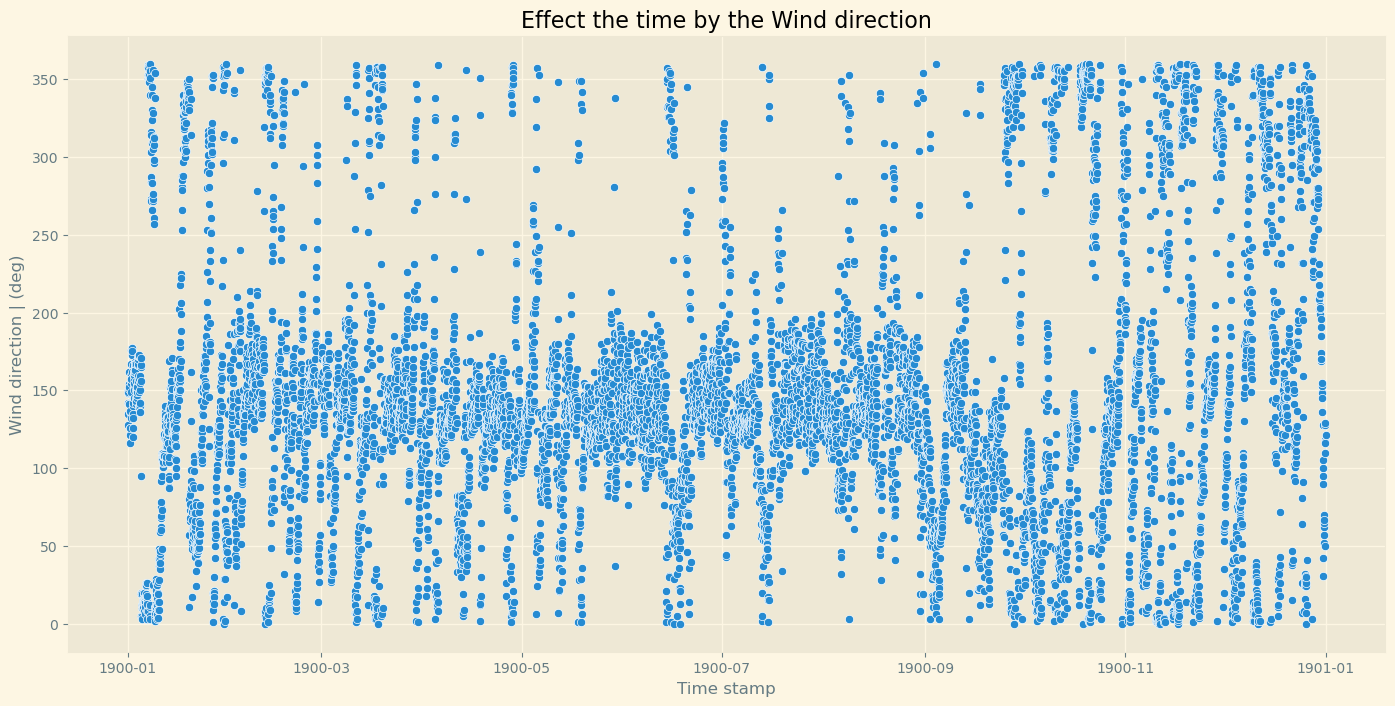

In [19]:
# the graph show effect the time by Wind direction
plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="Wind direction | (deg)",)
plt.title("Effect the time by the Wind direction")
plt.show()

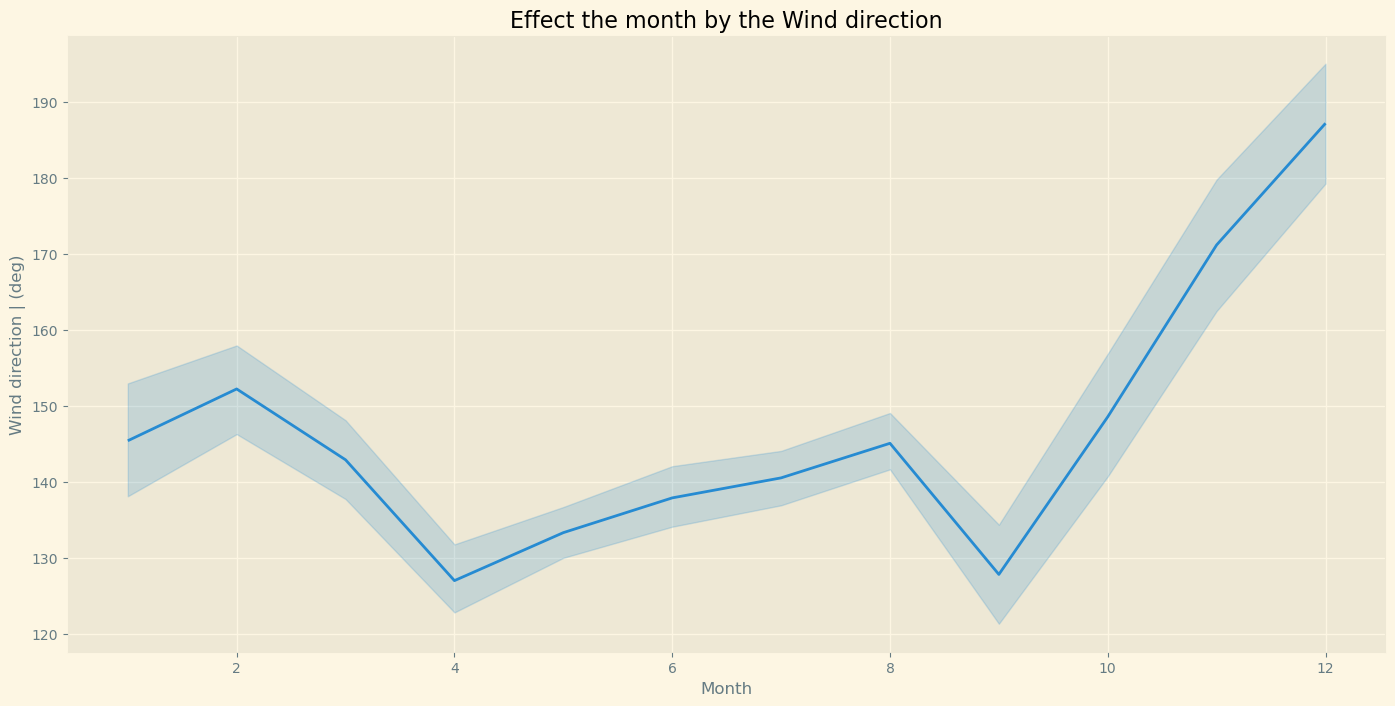

In [20]:
# the graph show effect the month by the Wind direction
plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Wind direction | (deg)",)
plt.title("Effect the month by the Wind direction")
plt.show()

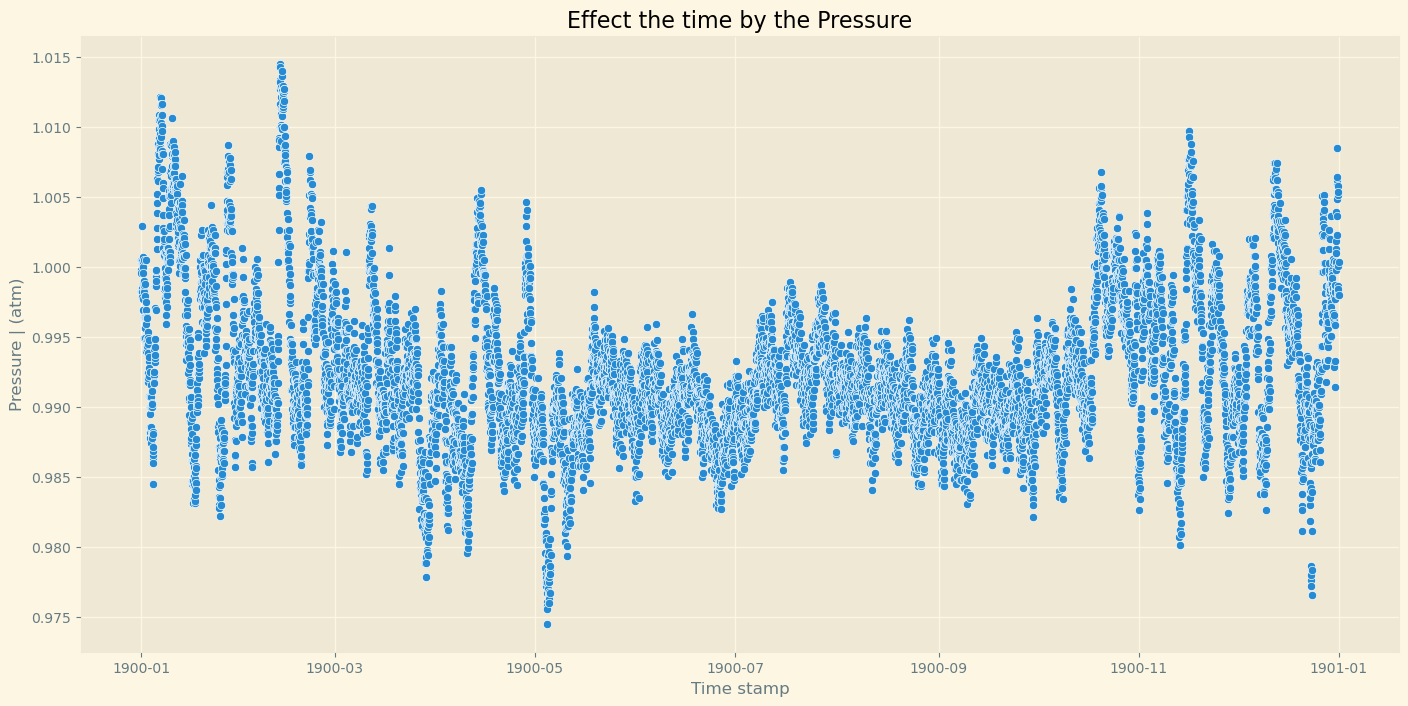

In [21]:
# the graph show effect the time by the Pressure
plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="Pressure | (atm)")
plt.title("Effect the time by the Pressure")
plt.show()

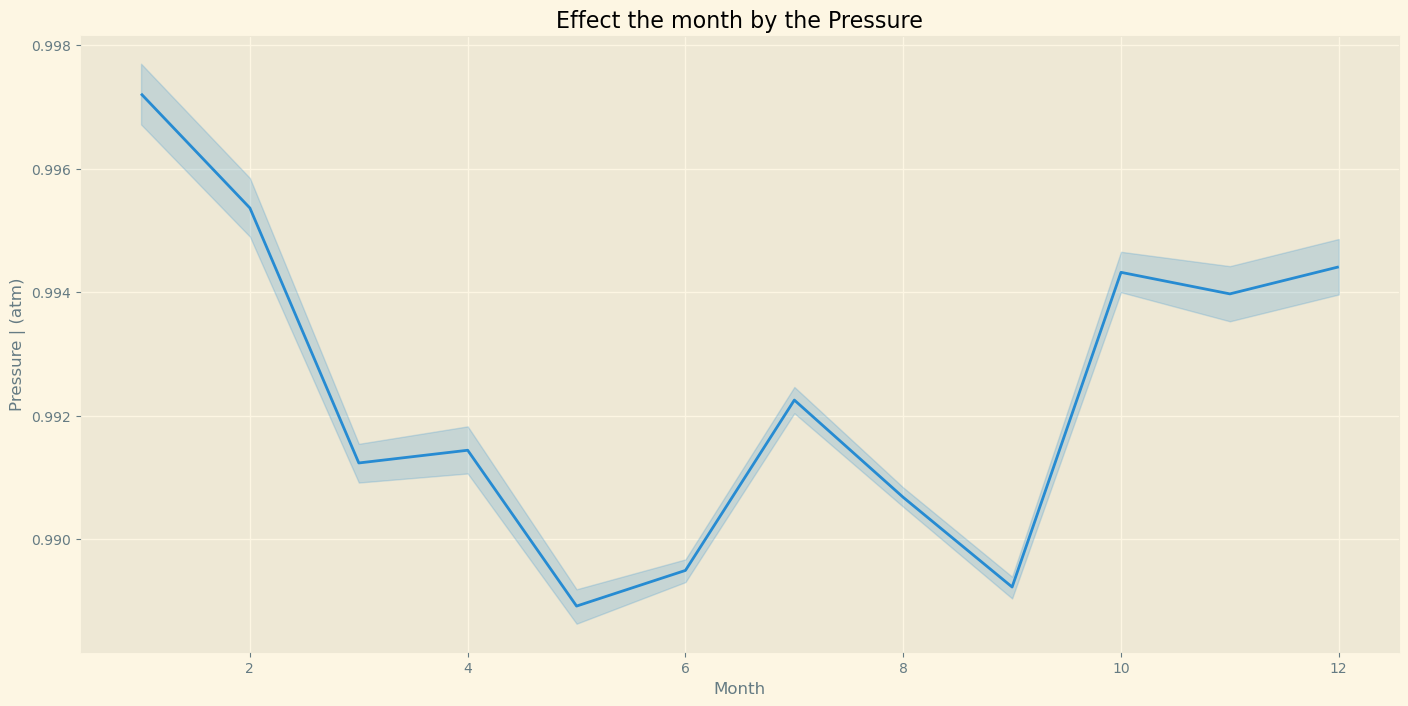

In [22]:
# the graph show effect the month by the Pressure
plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Pressure | (atm)",)
plt.title("Effect the month by the Pressure")
plt.show()


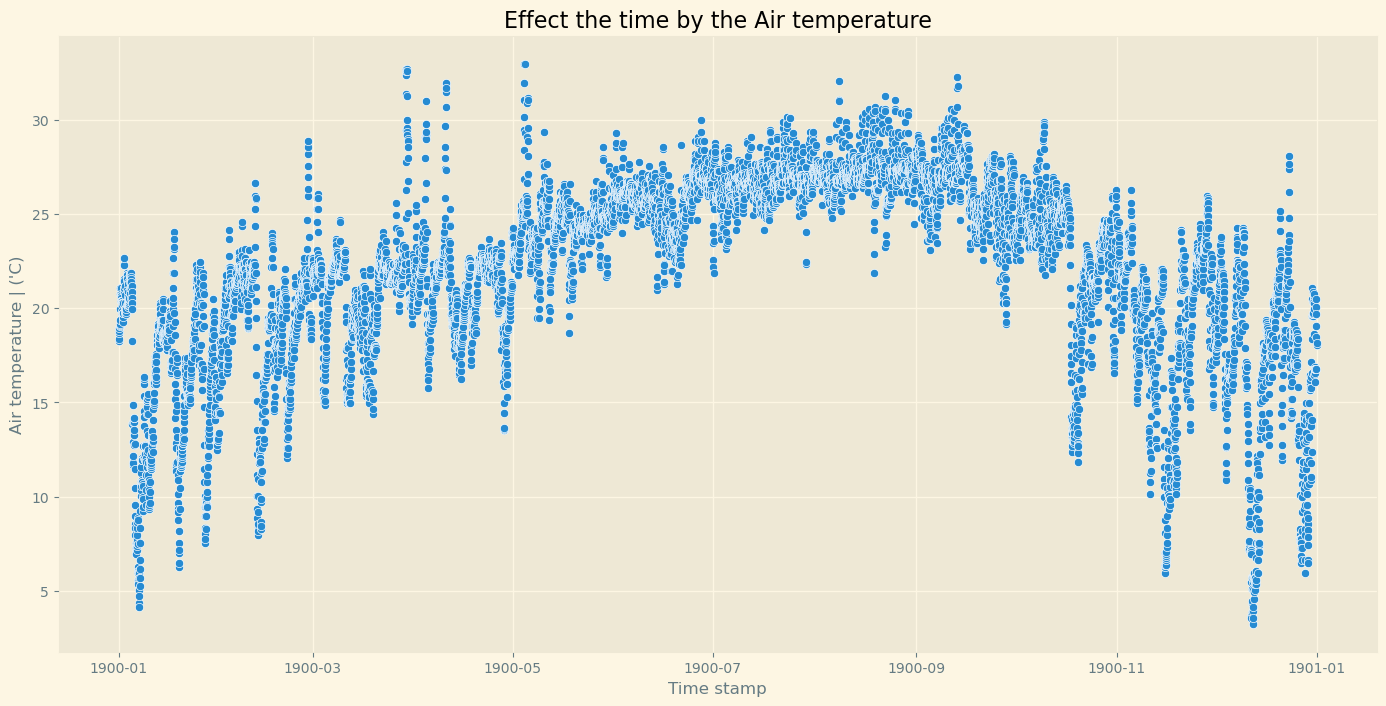

In [23]:
# the graph show effect the time by the Air temperature
plt.figure(figsize=(17,8))
sns.scatterplot(data=df,x="Time stamp",y="Air temperature | ('C)")
plt.title("Effect the time by the Air temperature")
plt.show()

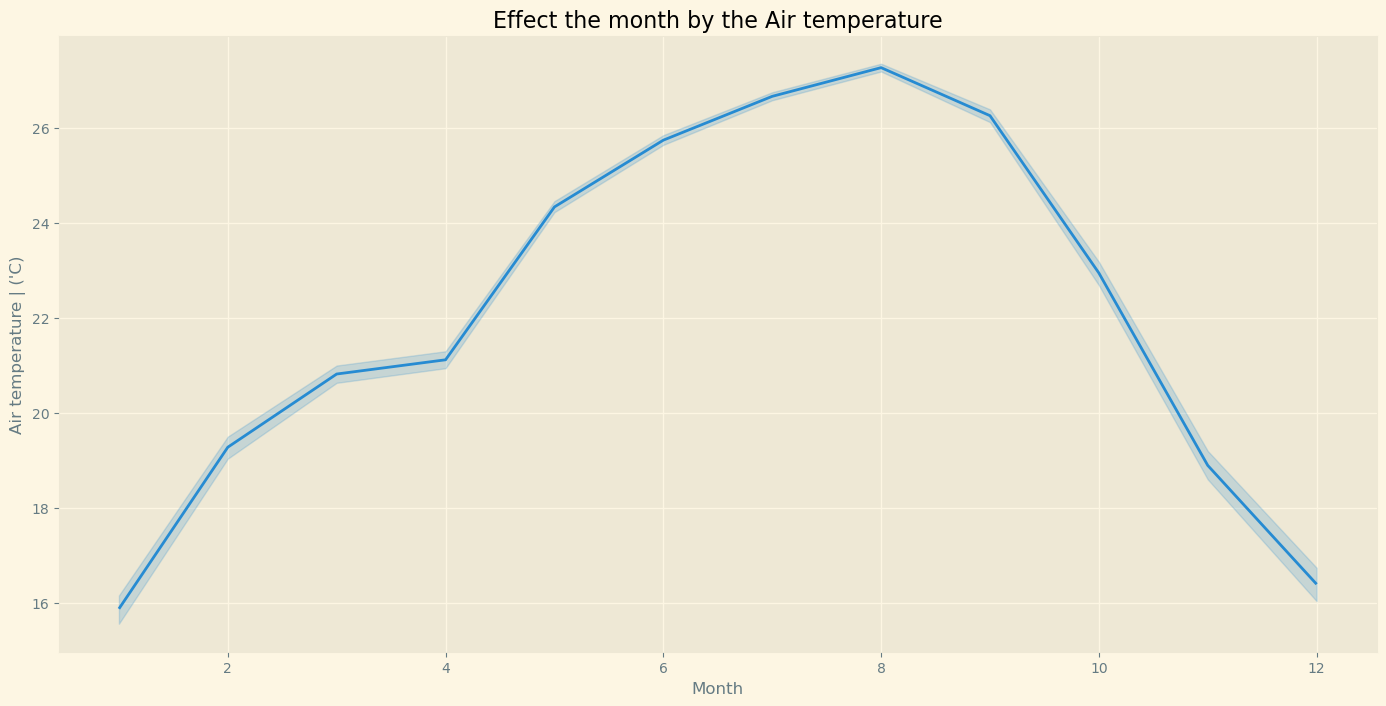

In [24]:
# the graph show effect the month by the Air temperature
plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="Month",y="Air temperature | ('C)",)
plt.title("Effect the month by the Air temperature")
plt.show()

# building model

In [90]:
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import warnings 

In [26]:
df.set_index("Time stamp",inplace=True)

In [27]:
df.head()

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month
Time stamp,,,,,,
1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1
1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1
1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1
1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1
1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1


In [28]:
#Defined X value and y value , and split the data train
X = df.drop(columns="System power generated | (kW)")           
y = df["System power generated | (kW)"]    # y = system power generated 

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (6132, 5)
X Test  :  (2628, 5)
Y Train :  (6132,)
Y Test  :  (2628,)


In [32]:
X_train.head()

,Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month
Time stamp,,,,,
1900-03-02 04:00:00,11.666,168,0.991397,21.463,3
1900-03-10 20:00:00,12.377,156,0.988237,22.563,3
1900-11-09 08:00:00,2.224,201,0.988733,19.163,11
1900-03-20 21:00:00,11.389,138,0.987351,20.763,3
1900-06-11 16:00:00,10.390,129,0.985373,24.663,6


In [29]:
#Defined object from library Regression 

LR = LinearRegression()
DTR = DecisionTreeRegressor()
C = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
XGB = XGBRegressor()
SVR = SVR()

In [30]:
# make for loop for Regression 

li = [LR,DTR,RFR,KNR,KNR,XGB,SVR]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 91.15180354603353
DecisionTreeRegressor() : 99.98748832630723
RandomForestRegressor() : 99.99579376924498
KNeighborsRegressor() : 93.4547729570837
KNeighborsRegressor() : 93.4547729570837
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 99.99452462693648
SVR() : -6.1902339346815

In [92]:
from joblib import dump

# Save the trained model to a file
dump(RFR, 'wind_prediction.joblib')

['wind_prediction.joblib']

In [93]:
from joblib import load

# Load the saved model from file
loaded_model = load('wind_prediction.joblib')